In [1]:
# # Instalação de pacotes úteis para programação quântica
# %pip install -U qiskit qiskit-aer qiskit-ibm-runtime
# %pip install qiskit-ignis qiskit-nature qiskit-machine-learning
# %pip install matplotlib pylatexenc ipywidgets plotly
# # %pip install scipy numpy
# # Instalação de pacotes essenciais para seus notebooks de IC
# %pip install numpy scipy matplotlib networkx rustworkx qiskit qiskit-aer qiskit-ibm-runtime
# # Atualiza o Qiskit completo e módulos IBM
# %pip install --upgrade qiskit qiskit-aer qiskit-ibm-runtime qiskit-terra
# %pip install matplotlib pylatexenc ipywidgets plotly


In [ ]:
# NumPy, SciPy e ferramentas de otimização
import numpy as np
from scipy.optimize import minimize

# Visualização
import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram, array_to_latex, plot_state_city
from rustworkx.visualization import mpl_draw as draw_graph

# Estruturas de grafos
import networkx as nx
import rustworkx as rx

# Qiskit: circuitos e operadores
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp, Statevector, Operator
from qiskit.circuit.library import QAOAAnsatz
import time


# Qiskit Runtime (estimador e sampler)
from qiskit_ibm_runtime import QiskitRuntimeService, Session, EstimatorV2, SamplerV2

# Aer Simulator (se quiser simulação local)
from qiskit_aer.primitives import Estimator
from qiskit_aer.primitives import EstimatorV2
from qiskit_aer import AerSimulator

: 

In [3]:
print("Ambiente configurado com sucesso para programação quântica!")

Ambiente configurado com sucesso para programação quântica!


In [4]:
# matriz_n = [
#     [1,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1],
#     [3,3,2,4,1,3,5,2,4,1,3,5,2,4,1,3,5,2,4,1],
#     [4,2,5,3,1,4,2,5,3,1,4,2,5,3,1,4,2,5,3,1],
#     [5,4,3,2,1,5,4,3,2,1,5,4,3,2,1,5,4,3,2,1],
#     [1,1,1,1,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
#     [2,3,4,5,1,1,3,4,5,1,2,3,4,5,1,2,3,4,5,1],
#     [3,5,2,4,1,3,3,2,4,1,3,5,2,4,1,3,5,2,4,1],
#     [4,2,5,3,1,4,2,5,3,1,4,2,5,3,1,4,2,5,3,1],
#     [5,4,3,2,1,5,4,3,2,1,5,4,3,2,1,5,4,3,2,1],
#     [1,1,1,1,1,1,1,1,1,4,1,1,1,1,1,1,1,1,1,1],
#     [2,3,4,5,1,2,3,4,5,1,1,3,4,5,1,2,3,4,5,1],
#     [3,5,2,4,1,3,5,2,4,1,3,3,2,4,1,3,5,2,4,1],
#     [4,2,5,3,1,4,2,5,3,1,4,2,5,3,1,4,2,5,3,1],
#     [5,4,3,2,1,5,4,3,2,1,5,4,3,2,1,5,4,3,2,1],
#     [1,1,1,1,1,1,1,1,1,1,1,1,1,1,4,1,1,1,1,1],
#     [2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,1,3,4,5,1],
#     [3,5,2,4,1,3,5,2,4,1,3,5,2,4,1,3,3,2,4,1],
#     [4,2,5,3,1,4,2,5,3,1,4,2,5,3,1,4,2,5,3,1],
#     [5,4,3,2,1,5,4,3,2,1,5,4,3,2,1,5,4,3,2,1],
#     [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,4]
# ]


# matriz_n = [
#     [ 0,  5, 2,  3,  1, 4,  2, 1,  6,  4, 3,  0],
#     [ 5,  0,  4, 1,  2,  3, 2,  1, 5,  0,  2, 1],
#     [2,  4,  0,  2, 3,  1,  5,  0,  3, 2,  1,  4],
#     [ 3, 1,  2,  0,  4,  1, 2,  5,  0,  2,  3, 1],
#     [ 1,  2, 3,  4,  0, 2,  1,  3, 1,  5,  0,  2],
#     [4,  3,  1,  1, 2,  0,  4, 3,  2,  1,  5, 2],
#     [ 2, 2,  5, 2,  1,  4,  0,  3,  2,  1, 4,  3],
#     [1,  1,  0,  5,  3, 3,  3,  0,  1, 2,  4, 2],
#     [ 6, 5,  3,  0, 1,  2, 2,  1,  0,  4, 3,  1],
#     [ 4,  0, 2,  2,  5,  1,  1,  2, 4,  0,  3, 2],
#     [3,  2,  1,  3,  0,  5, 4,  4, 3, 3,  0,  1],
#     [ 0, 1,  4, 1,  2, 2,  3, 2, 1, 2,  1,  0]
# ]

matriz_n = [
   [0,1,0,0,1],
   [1,0,1,0,1],
   [0,1,0,1,0],
   [0,0,1,0,1],
    [1,1,0,1,0]
]

# Verificação e conversão
ja_adjacente = True
n = len(matriz_n)
for i in range(n):
    if matriz_n[i][i] != 0:
        ja_adjacente = False
        break
    for j in range(i + 1, n):
        if matriz_n[i][j] != matriz_n[j][i]:
            ja_adjacente = False
            break
if ja_adjacente:
    print("A matriz já é adjacente")
else:
    print("A matriz não é adjacente")

matriz_array = np.array(matriz_n, dtype=float)
np.fill_diagonal(matriz_array, 0)
grafo = rx.PyGraph.from_adjacency_matrix(matriz_array)
print("Matriz de adjacência:")
print(matriz_array, "\n")
print(f"{grafo.num_nodes()} nós, {grafo.num_edges()} arestas e tamanho {n}")

A matriz já é adjacente
Matriz de adjacência:
[[0. 1. 0. 0. 1.]
 [1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0.]
 [0. 0. 1. 0. 1.]
 [1. 1. 0. 1. 0.]] 

5 nós, 6 arestas e tamanho 5


In [5]:
# Hamiltoniano de custo
def custo_hamiltoniano(matriz_adjacente, n):
    h_custo = SparsePauliOp("I" * n, coeffs=[0])
    for i in range(n):
        for j in range(i + 1, n):
            if matriz_adjacente[i][j] != 0:
                peso = matriz_adjacente[i][j]
                pauli_string = ["I"] * n; pauli_string[i] = "Z"; pauli_string[j] = "Z"
                h_custo += SparsePauliOp("".join(pauli_string), coeffs=[peso])
    return h_custo
hamiltoniano = custo_hamiltoniano(matriz_array, n)

print("Hamiltoniano de custo:")
print(hamiltoniano)

Hamiltoniano de custo:
SparsePauliOp(['IIIII', 'ZZIII', 'ZIIIZ', 'IZZII', 'IZIIZ', 'IIZZI', 'IIIZZ'],
              coeffs=[0.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j])


In [6]:
# Hamiltoniano de mistura
def misturador_hamiltaniano(n):
    total_operator = SparsePauliOp("I" * n, coeffs=[0])
    for i in range(n):
        pauli_operador = ["I"] * n; pauli_operador[i] = "X"
        total_operator += SparsePauliOp("".join(pauli_operador), coeffs=[1.0])
    return total_operator

print("Hamiltoniano de mistura:")
print(misturador_hamiltaniano(n))

Hamiltoniano de mistura:
SparsePauliOp(['IIIII', 'XIIII', 'IXIII', 'IIXII', 'IIIXI', 'IIIIX'],
              coeffs=[0.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j])


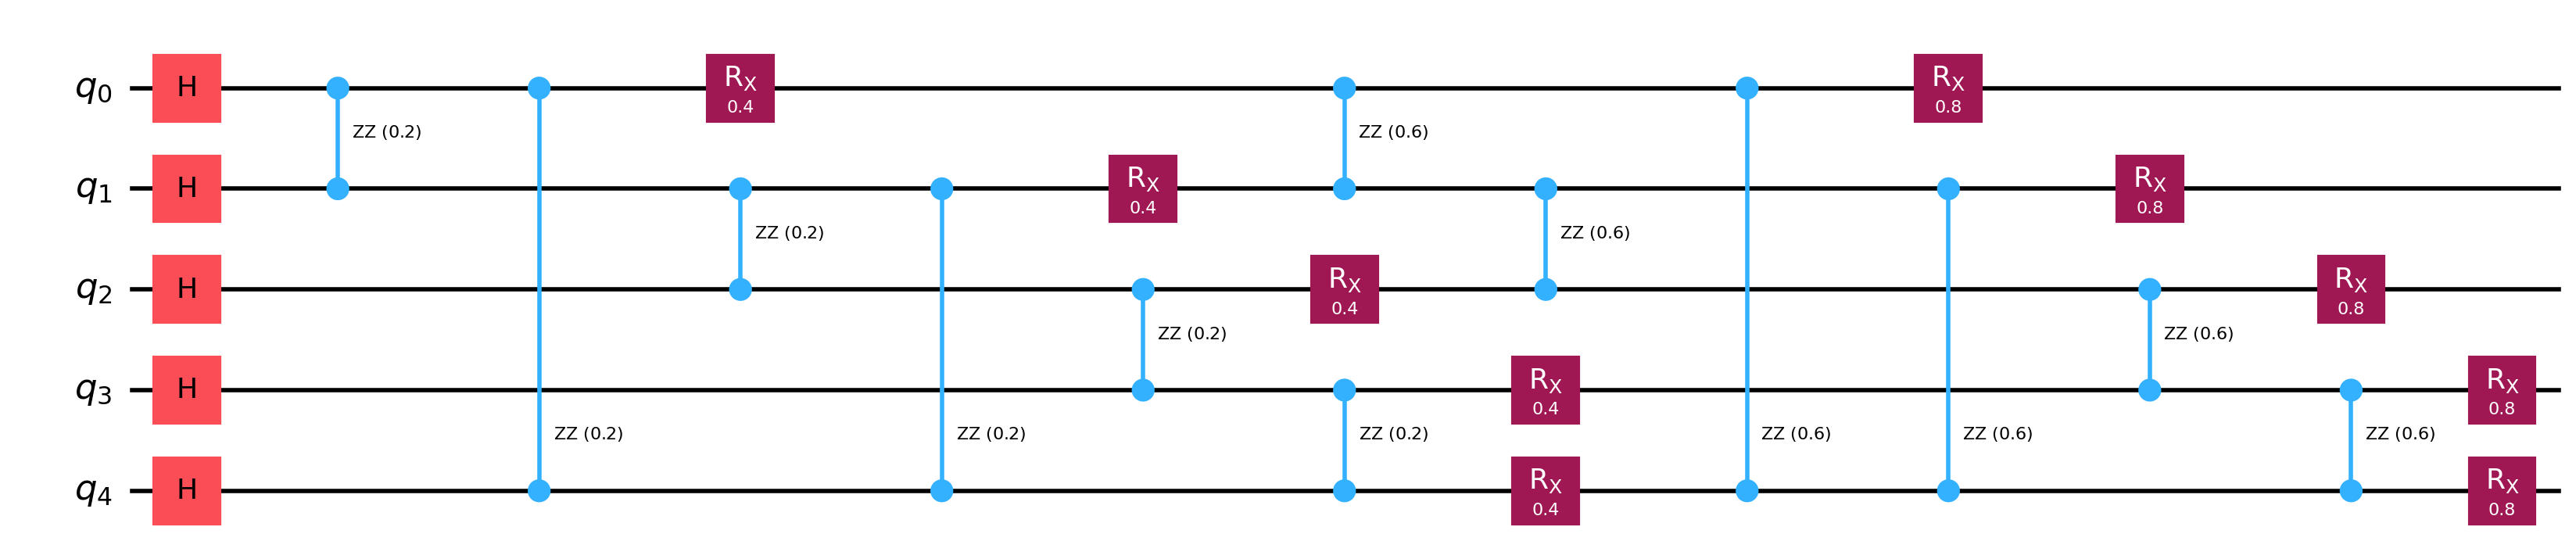

In [7]:
# Circuito QAOA
def criar_circuito_qaoa_manual(params, n, matriz_adjacente, p=2):
    qc = QuantumCircuit(n)
    for qubit in range(n): qc.h(qubit)
    idx = 0
    for _ in range(p):
        gamma, beta = params[idx], params[idx + 1]; idx += 2
        for i in range(n):
            for j in range(i + 1, n):
                if matriz_adjacente[i][j] != 0: qc.rzz(2 * gamma * matriz_adjacente[i][j], i, j)
        for i in range(n): qc.rx(2 * beta, i)
    return qc

p_teste = 2
parametros_teste = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
qc = criar_circuito_qaoa_manual(parametros_teste, n, matriz_array, p_teste)
qc.draw('mpl', fold = False, scale = 2, idle_wires = False)
     

In [8]:

# Valor esperado 
def expect_value(params, n, matriz_adjacente, p, estimator, h_custo):

    qc = criar_circuito_qaoa_manual(params, n, matriz_adjacente, p)
    job = estimator.run(circuits=[qc], observables=[h_custo])
    result = job.result()
    return result.values[0]

In [9]:
# Corte esperado
total_weight = np.sum(matriz_array) / 2
def CorteQ(params, n, pesos, p, estimator): return total_weight / 2 - 0.5 * expect_value(params, n, pesos, p, estimator, hamiltoniano)
def neg_CorteQ(params, n, pesos, p, estimator): return -CorteQ(params, n, pesos, p, estimator)

In [10]:

# Corte real
def Corte(pesos, A, n):
    B = set(range(n)) - set(A)
    cut = 0
    for i in A:
        for j in B:
            if pesos[i][j] > 0:
                cut += pesos[i][j]
    return cut

In [11]:
# QAOA com varias execucões
inicio = time.time()
p = 4
best_corte_max = -np.inf
best_parametros = None
num_runs = 5

for run in range(num_runs):
    #np.random.seed(run)
    parametros_iniciais = [2 * np.pi * np.random.random() for _ in range(2 * p)]
    estimator = Estimator()
    corte_0 = CorteQ(parametros_iniciais, n, matriz_array, p, estimator)
    res = minimize(neg_CorteQ, parametros_iniciais, args=(n, matriz_array, p, estimator), tol=1e-6, method="COBYLA")
    corte_max = -res.fun
    if corte_max > best_corte_max:
        best_corte_max = corte_max
        best_parametros = res.x
fim = time.time()
print(f"Melhor corte inicial: {corte_0}, Melhor corte máximo: {best_corte_max}, Tempo total: {(fim - inicio)/60:.2f} min")

parametros_max = best_parametros
circ = criar_circuito_qaoa_manual(parametros_max, n, matriz_array, p)
sim = AerSimulator(method='statevector')
circ.save_statevector()
result = sim.run(circ).result()
state = result.get_statevector()
probs = np.abs(state)**2
estados = [format(i, f'0{n}b') for i in range(2**n)]

# Corte médio ponderado
media_corte = sum(
    Corte(matriz_array, [k for k in range(n) if estado[k]=='1'], n) * prob
    for estado, prob in zip(estados, probs)
)
print(f"Corte médio ponderado: {media_corte:.4f}")

# Top-k mais prováveis para corte concreto
top_k = sorted(zip(estados, probs), key=lambda x: x[1], reverse=True)[:10]
melhor_corte = -1
for estado, prob in top_k:
    A = [k for k in range(n) if estado[k]=='1']
    corte = Corte(matriz_array, A, n)
    if corte > melhor_corte:
        melhor_corte = corte
        melhor_estado = estado
        melhor_A = A

print(f"Melhor estado top-k: {melhor_estado}, Corte: {melhor_corte}, Partição: (A={melhor_A}, B={list(set(range(n)) - set(melhor_A))})")




'''

Proxima ideia é tentar subistituir o cobyla por um mais robusto
Estudar o algoritimo falcon
suavização, normalização(ja feita)
Campo externo
Variavel mapeadora....
proxima modificações

'''

Melhor corte inicial: 3.6142578125, Melhor corte máximo: 4.1875, Tempo total: 1.43 min
Corte médio ponderado: 4.1282
Melhor estado top-k: 10101, Corte: 5.0, Partição: (A=[0, 2, 4], B=[1, 3])


'\n\nProxima ideia é tentar subistituir o cobyla por um mais robusto\nEstudar o algoritimo falcon\nsuavização, normalização(ja feita)\nCampo externo\nVariavel mapeadora....\nproxima modificações\n\n'